In [ ]:
# prompt: importa drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


PRE-PROCESSING DATA

In [ ]:
import pandas as pd

# Carica il dataset
file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/Chennai Sales Data.csv"
data = pd.read_csv(file_path)

# Identifica le colonne categoriche ed escludi le colonne di data
# Presumendo che le colonne di data siano quelle che hanno 'date' nel loro nome
categorical_columns = [col for col in data.columns if data[col].dtype == 'object' and 'date' not in col.lower()]

# Crea un dizionario per memorizzare i valori unici per ciascuna colonna categorica
unique_values_dict = {}

for col in categorical_columns:
    unique_values = data[col].unique()
    unique_values_dict[col] = unique_values

# Crea un DataFrame per memorizzare i valori unici
# Usa un DataFrame con ogni colonna che contiene i valori unici della corrispondente colonna categorica
unique_values_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in unique_values_dict.items()]))

# Salva il DataFrame in un file CSV
output_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/categorical_unique_values.csv"
unique_values_df.to_csv(output_file_path, index=False)
print("I valori unici per le colonne categoriche sono stati salvati in", output_file_path)


I valori unici per le colonne categoriche sono stati salvati in /content/drive/MyDrive/Colab Notebooks/iconDataset/categorical_unique_values.csv


In [ ]:
print(categorical_columns)


['PRT_ID', 'AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']


In [ ]:


# Definisci le correzioni per le colonne categoriche
corrections = {
    'AREA': {
        # Corregge errori di battitura nei nomi delle aree
        'Karapakam': 'Karapakkam',
        'Chrompt': 'Chrompet',
        'Chrmpet': 'Chrompet',
        'Ana Nagar': 'Anna Nagar',
        'Adyr': 'Adyar',
        'Velchery': 'Velachery',
        'Ann Nagar': 'Anna Nagar',
        'KKNagar': 'KK Nagar',
        'Karapakam': 'Karapakkam',
        'Chormpet': 'Chrompet'
    },
    'SALE_COND': {
        # Unifica le variazioni di scrittura per le condizioni di vendita
        'AbNormal': 'Ab Normal',
        'Ab Normal': 'Ab Normal',
        'Partiall': 'Partial',
        'Adj Land': 'AdjLand',
        'PartiaLl': 'Partial'
    },
    'PARK_FACIL': {
        # Corregge errori di battitura nella disponibilità di parcheggio
        'Noo': 'No'
    },
    'BUILDTYPE': {
        # Corregge errori di battitura nei tipi di costruzione
        'Comercial': 'Commercial',
        'Other': 'Others'
    },
    'UTILITY_AVAIL': {
        # Unifica le variazioni di scrittura per la disponibilità dei servizi
        'ELO': 'AllPub',
        'NoSewr': 'NoSeWa',
        'NoSeWa': 'NoSeWa',
        'All Pub': 'AllPub'
    },
    'STREET': {
        # Corregge errori di battitura nei tipi di strada
        'Pavd': 'Paved',
        'NoAccess': 'No Access'
    }
}

# Carica il dataset
#file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/Chennai Sales Data.csv"
data = pd.read_csv(file_path)

# Applica le correzioni alle colonne categoriche
for col, mapping in corrections.items():
    if col in data.columns:
        data[col] = data[col].replace(mapping)

# Salva i dati corretti in un nuovo file CSV
corrected_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/Chennai_Sales_Data_Corrected.csv"
data.to_csv(corrected_file_path, index=False)
print("Il file corretto è stato salvato.")


Il file corretto è stato salvato.


In [ ]:
#import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import joblib

# Carica il dataset corretto
#file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/Chennai_Sales_Data_Corrected.csv"
house_data = pd.read_csv(corrected_file_path)

# Converti le colonne di data in formato datetime
house_data['DATE_SALE'] = pd.to_datetime(house_data['DATE_SALE'], format='%d-%m-%Y')
house_data['DATE_BUILD'] = pd.to_datetime(house_data['DATE_BUILD'], format='%d-%m-%Y')

# Estrai componenti utili dalle colonne di data
house_data['SALE_YEAR'] = house_data['DATE_SALE'].dt.year
house_data['SALE_MONTH'] = house_data['DATE_SALE'].dt.month
house_data['BUILD_YEAR'] = house_data['DATE_BUILD'].dt.year
house_data['BUILD_AGE'] = house_data['SALE_YEAR'] - house_data['BUILD_YEAR']

# Elimina le colonne originali di data se non sono più necessarie
house_data = house_data.drop(columns=['DATE_SALE', 'DATE_BUILD'])

# Elimina le caratteristiche che sono meno utili per la previsione o che possono portare all'overfitting
house_data = house_data.drop(columns=['PRT_ID', 'SALE_COND', 'STREET', 'MZZONE', 'UTILITY_AVAIL'])

# Gestisci i valori mancanti
num_cols = house_data.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
house_data[num_cols] = imputer.fit_transform(house_data[num_cols])

# Codifica le variabili categoriche
cat_cols = house_data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    house_data[col] = le.fit_transform(house_data[col])
    label_encoders[col] = le

# Salva i label encoders in un file joblib
label_encoder_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/label_encoders.pkl"
joblib.dump(label_encoders, label_encoder_file_path)

# Salva i dati preelaborati
output_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/preprocessed_house_data.csv"
house_data.to_csv(output_file_path, index=False)
print("Il file preelaborato e i label encoders sono stati salvati.")


Il file preelaborato e i label encoders sono stati salvati.


In [ ]:
house_data

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,SALE_YEAR,SALE_MONTH,BUILD_YEAR,BUILD_AGE
0,4,1004.0,131.0,1.0,1.0,3.0,1,0,4.0,3.9,4.9,4.330,380000.0,144400.0,7600000.0,2011,5,1967,44
1,1,1986.0,26.0,2.0,1.0,5.0,0,0,4.9,4.2,2.5,3.765,760122.0,304049.0,21717770.0,2006,12,1995,11
2,0,909.0,70.0,1.0,1.0,3.0,1,0,4.1,3.8,2.2,3.090,421094.0,92114.0,13159200.0,2012,2,1992,20
3,7,1855.0,14.0,3.0,2.0,5.0,0,2,4.7,3.9,3.6,4.010,356321.0,77042.0,9630290.0,2010,3,1988,22
4,4,1226.0,84.0,1.0,1.0,3.0,1,2,3.0,2.5,4.1,3.290,237000.0,74063.0,7406250.0,2009,10,1979,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,4,598.0,51.0,1.0,1.0,2.0,0,2,3.0,2.2,2.4,2.520,208767.0,107060.0,5353000.0,2011,1,1962,49
7105,7,1897.0,52.0,3.0,2.0,5.0,1,2,3.6,4.5,3.3,3.920,346191.0,205551.0,10818480.0,2004,4,1995,9
7106,7,1614.0,152.0,2.0,1.0,4.0,0,1,4.3,4.2,2.9,3.840,317354.0,167028.0,8351410.0,2006,8,1978,28
7107,4,787.0,40.0,1.0,1.0,2.0,1,0,4.6,3.8,4.1,4.160,425350.0,119098.0,8507000.0,2009,8,1977,32


CORRELAZIONE

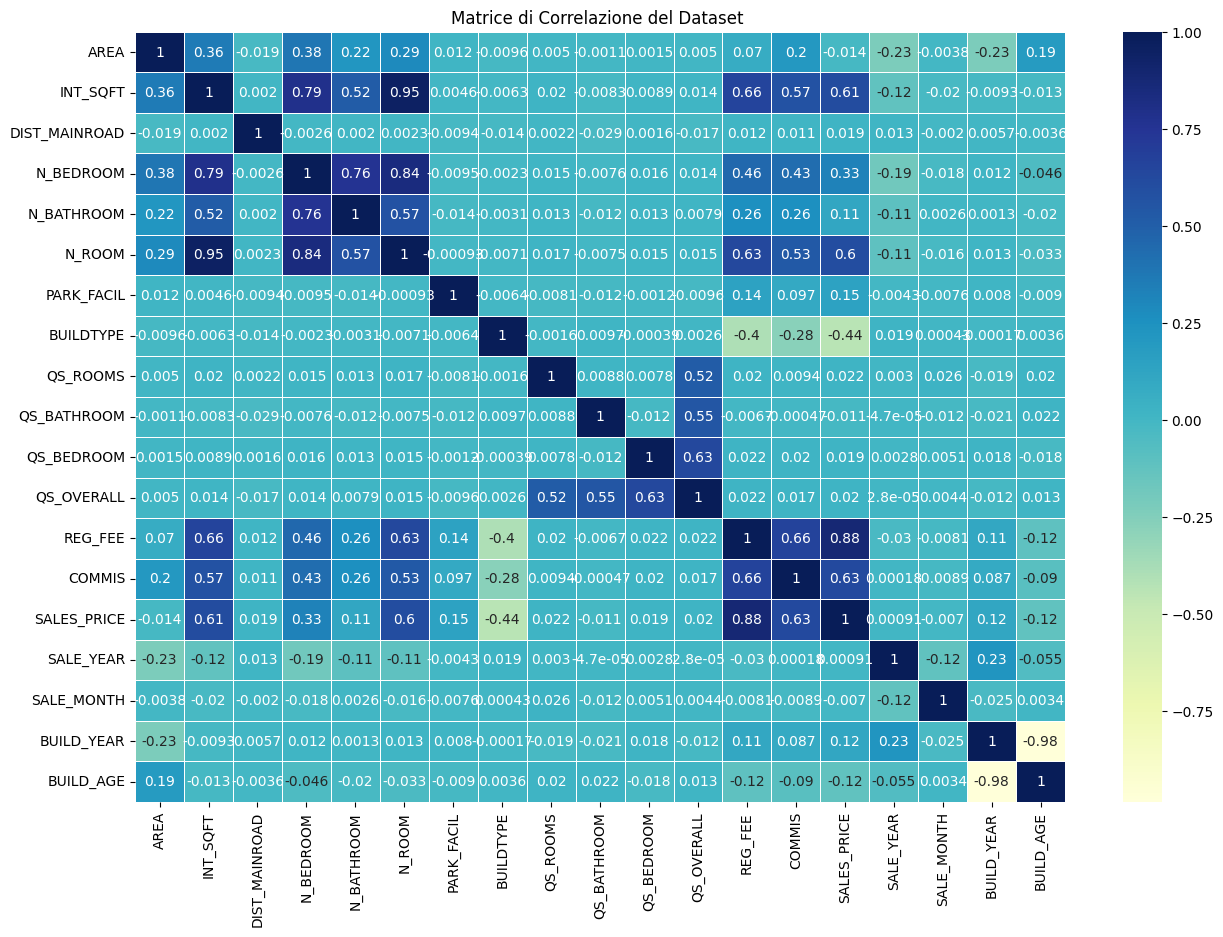

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la matrice di correlazione
correlation_matrix = house_data.corr()

# Crea una mappa di calore (heatmap) per visualizzare le correlazioni
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Matrice di Correlazione del Dataset ")
plt.show()


IMPORTANZA DELLE FEATURE

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib

# Carica i dati preelaborati
house_data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/iconDataset/preprocessed_house_data.csv")

# Definisci le caratteristiche e la variabile target
X = house_data.drop(columns=['SALES_PRICE'])
y = house_data['SALES_PRICE']

# Suddividi i dati in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Addestra un modello per valutare l'importanza delle caratteristiche (RandomForestRegressor usato qui come esempio)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Analisi dell'importanza delle caratteristiche
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print("Importanza delle caratteristiche:\n", feature_importance.sort_values(by='Importance', ascending=False))

# Opzionalmente: Elimina le caratteristiche con importanza molto bassa se lo si desidera
threshold = 0.01  # Esempio di soglia per l'importanza delle caratteristiche
important_features = feature_importance[feature_importance['Importance'] > threshold]['Feature']
X = X[important_features.tolist()]
print("Selezione delle caratteristiche completata. Caratteristiche selezionate salvate.")



Importanza delle caratteristiche:
           Feature  Importance
12        REG_FEE    0.770348
0            AREA    0.075496
1        INT_SQFT    0.055797
7       BUILDTYPE    0.035141
3       N_BEDROOM    0.015695
4      N_BATHROOM    0.010283
13         COMMIS    0.009797
2   DIST_MAINROAD    0.003198
11     QS_OVERALL    0.002937
8        QS_ROOMS    0.002755
9     QS_BATHROOM    0.002733
6      PARK_FACIL    0.002572
10     QS_BEDROOM    0.002524
14      SALE_YEAR    0.002384
16     BUILD_YEAR    0.002287
17      BUILD_AGE    0.002267
15     SALE_MONTH    0.002081
5          N_ROOM    0.001705
Selezione delle caratteristiche completata. Caratteristiche selezionate salvate.


APPRENDIMENTO SUPERVISIONATO (TRAIN DEI MODELLI CON IPERPARAMETRI E VALUTAZIONE CON METRICHE )

Modelli: RandomForest, Lasso, Ridge, DecisionTree, GradientBoosting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import time

# Carica i dati preelaborati
file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/preprocessed_house_data.csv"
house_data = pd.read_csv(file_path)

# Definisci le caratteristiche e la variabile target in base alle caratteristiche selezionate
selected_features = [
    'REG_FEE', 'AREA', 'INT_SQFT', 'BUILDTYPE', 'N_BEDROOM', 'N_BATHROOM',
    'COMMIS', 'DIST_MAINROAD', 'QS_OVERALL', 'QS_ROOMS', 'QS_BATHROOM',
    'PARK_FACIL', 'QS_BEDROOM', 'SALE_YEAR', 'BUILD_YEAR', 'BUILD_AGE',
    'SALE_MONTH', 'N_ROOM'
]
X = house_data[selected_features]
y = house_data['SALES_PRICE']

# Suddividi i dati in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisci i modelli e gli iperparametri per la Grid Search
models = {
    'RandomForest': RandomForestRegressor(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'DecisionTree': DecisionTreeRegressor(),
    'GradientBoosting': GradientBoostingRegressor()
}
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Lasso': {
        'alpha': [0.01, 0.1, 1, 10]
    },
    'Ridge': {
        'alpha': [0.01, 0.1, 1, 10]
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    }
}

# Esegui la Grid Search e addestra i modelli
best_models = {}
training_times = {}
prediction_times = {}
mse_scores = {}

# Inizializza variabili per tracciare il miglior modello
best_mse = float("inf")
best_model_name = None

for model_name, model in models.items():
    print(f"Addestramento {model_name}...")
    start_train_time = time.time()
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    print(f"Migliori iperparametri per {model_name}: {grid_search.best_params_}")



    best_models[model_name] = grid_search.best_estimator_
    end_train_time = time.time()
    training_time = end_train_time - start_train_time
    training_times[model_name] = training_time

    # Valuta il modello
    start_pred_time = time.time()
    y_pred = best_models[model_name].predict(X_test)
    end_pred_time = time.time()
    prediction_time = end_pred_time - start_pred_time
    prediction_times[model_name] = prediction_time
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[model_name] = mse  # Salva il MSE per il confronto
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} MSE: {mse}")
    print(f"{model_name} MAE: {mae}")
    print(f"{model_name} R²: {r2}")
    print(f"{model_name} Tempo di addestramento: {training_time:.4f} secondi")
    print(f"{model_name} Tempo di predizione: {prediction_time:.4f} secondi \n")

    # Aggiorna il miglior modello in base al MSE
    if mse < best_mse:
        best_mse = mse
        best_model_name = model_name

# Stampa il nome del miglior modello
print(f"\nIl miglior modello è: {best_model_name} con MSE di {best_mse:.4f}")

# Salva il miglior modello
best_model = best_models[best_model_name]
model_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/best_model.pkl"
joblib.dump(best_model, model_file_path)
print("Il miglior modello è stato salvato.")

# Salva il modello Decision Tree in un file separato
if 'DecisionTree' in best_models:
    decision_tree_model = best_models['DecisionTree']
    decision_tree_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/decision_tree_model.pkl"
    joblib.dump(decision_tree_model, decision_tree_file_path)
    print("Il modello Decision Tree è stato salvato.")


Addestramento RandomForest...
Migliori iperparametri per RandomForest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
RandomForest MSE: 565530181654.2603
RandomForest MAE: 598555.0217155752
RandomForest R²: 0.9569526659098084
RandomForest Tempo di addestramento: 584.2816 secondi
RandomForest Tempo di predizione: 0.0827 secondi 

Addestramento Lasso...
Migliori iperparametri per Lasso: {'alpha': 10}
Lasso MSE: 1901049798438.0662
Lasso MAE: 1103898.1108480382
Lasso R²: 0.8552948570205839
Lasso Tempo di addestramento: 2.3415 secondi
Lasso Tempo di predizione: 0.0063 secondi 

Addestramento Ridge...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.73456e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.6071e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.68839e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.66573e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

Migliori iperparametri per Ridge: {'alpha': 1}
Ridge MSE: 1901082187476.7986
Ridge MAE: 1103906.0907978127
Ridge R²: 0.8552923916141097
Ridge Tempo di addestramento: 0.4857 secondi
Ridge Tempo di predizione: 0.0043 secondi 

Addestramento DecisionTree...
Migliori iperparametri per DecisionTree: {'max_depth': 10, 'min_samples_split': 10}
DecisionTree MSE: 854872443472.506
DecisionTree MAE: 708451.2451733568
DecisionTree R²: 0.934928354184362
DecisionTree Tempo di addestramento: 2.9068 secondi
DecisionTree Tempo di predizione: 0.0027 secondi 

Addestramento GradientBoosting...
Migliori iperparametri per GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
GradientBoosting MSE: 545248261911.369
GradientBoosting MAE: 579163.8921915657
GradientBoosting R²: 0.958496496112838
GradientBoosting Tempo di addestramento: 420.5038 secondi
GradientBoosting Tempo di predizione: 0.0139 secondi 


Il miglior modello è: GradientBoosting con MSE di 545248261911.3690
Il miglior mo

Performance Comparison

<ipython-input-23-6a294d56ae9a>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_values, palette=palette)
<ipython-input-23-6a294d56ae9a>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mae_values, palette=palette)
<ipython-input-23-6a294d56ae9a>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_values, palette=palette)


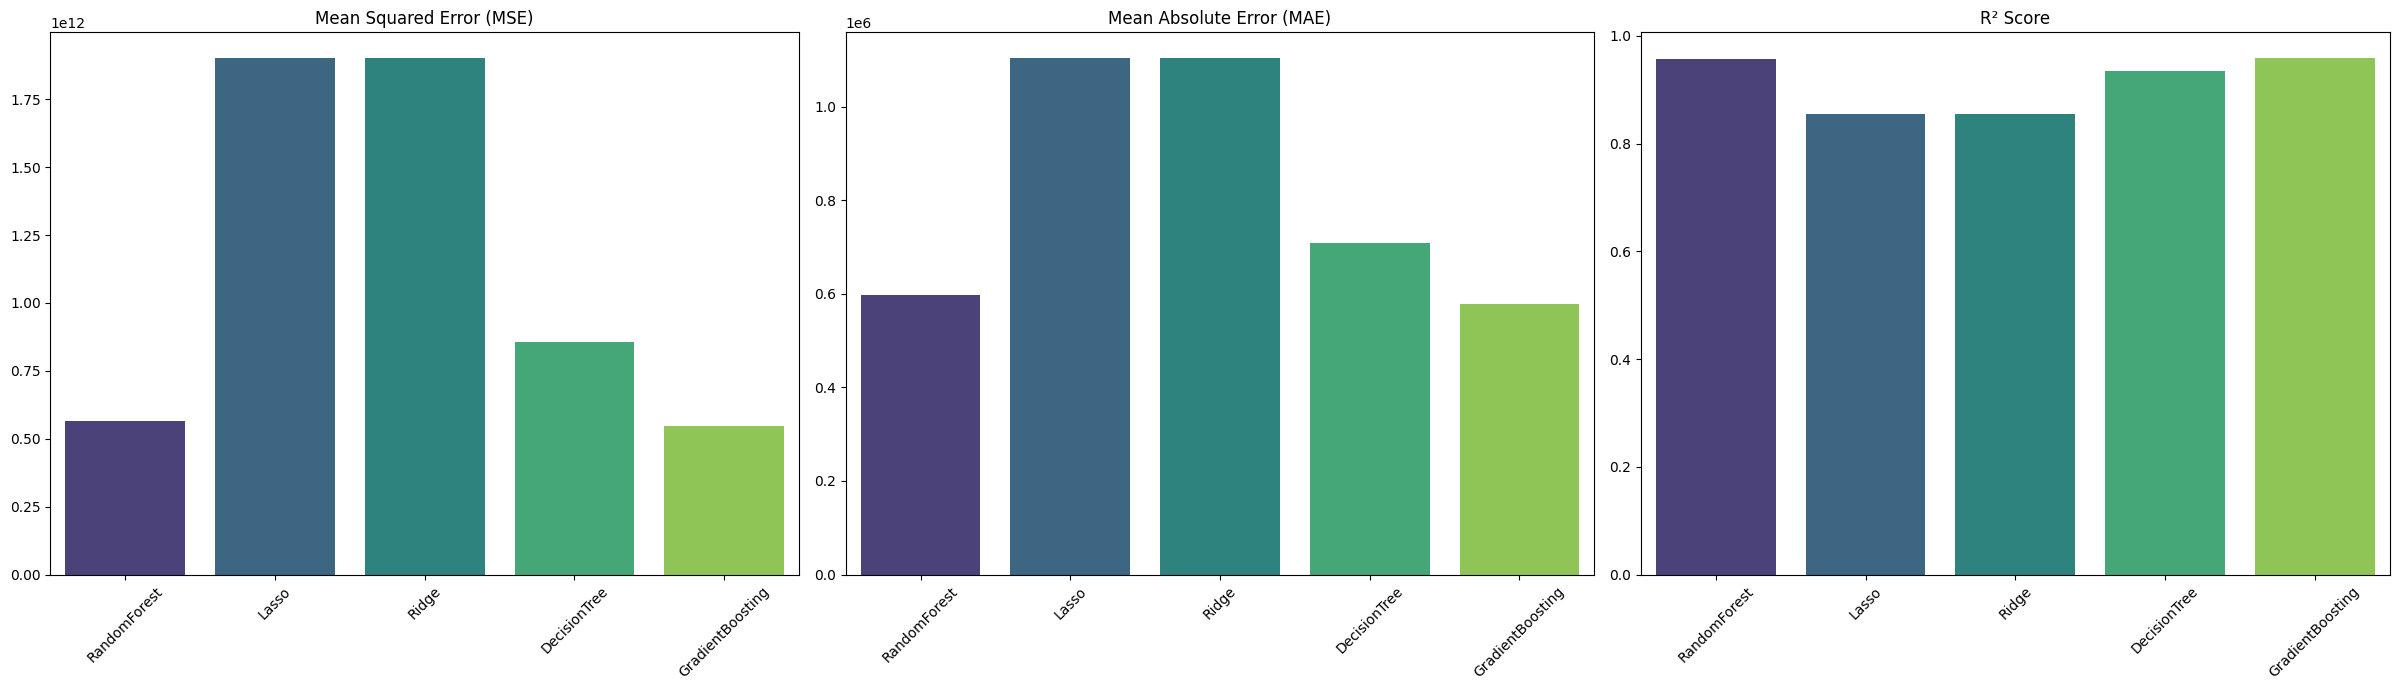

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Crea una lista delle metriche per ciascun modello
models = list(best_models.keys())
mse_values = []
mae_values = []
r2_values = []

# Estrai le metriche per ciascun modello
for model_name in models:
    y_pred = best_models[model_name].predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

# Grafico delle metriche
plt.figure(figsize=(40, 7))  # Aumenta la dimensione della figura


# Definisci una palette di colori
palette = "viridis"  # Puoi scegliere altre palette come 'magma', 'plasma', 'cividis', etc.

# Plot MSE
plt.subplot(1, 5, 1)
sns.barplot(x=models, y=mse_values, palette=palette)
plt.title("Mean Squared Error (MSE)")
plt.xticks(rotation=45)

# Plot MAE
plt.subplot(1, 5, 2)
sns.barplot(x=models, y=mae_values, palette=palette)
plt.title("Mean Absolute Error (MAE)")
plt.xticks(rotation=45)

# Plot R² Score
plt.subplot(1, 5, 3)
sns.barplot(x=models, y=r2_values, palette=palette)
plt.title("R² Score")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Learning Curve


Deviazioni standard e varianze per il modello RandomForest:
 Train Size    Train STD    Train VAR     Test STD     Test VAR
        454 1.784182e+10 3.183307e+20 1.250608e+11 1.564020e+22
        909 3.201615e+09 1.025034e+19 4.521985e+10 2.044834e+21
       1364 6.475591e+09 4.193328e+19 6.243432e+10 3.898044e+21
       1819 2.203433e+09 4.855117e+18 2.386925e+10 5.697409e+20
       2274 2.231955e+09 4.981622e+18 7.383929e+09 5.452240e+19
       2729 2.053702e+09 4.217694e+18 1.580088e+10 2.496679e+20
       3184 1.890192e+09 3.572826e+18 1.946891e+10 3.790386e+20
       3639 1.416919e+09 2.007659e+18 2.107380e+10 4.441051e+20
       4094 2.322922e+09 5.395967e+18 2.000350e+10 4.001401e+20
       4549 1.761217e+09 3.101885e+18 2.230332e+10 4.974381e+20


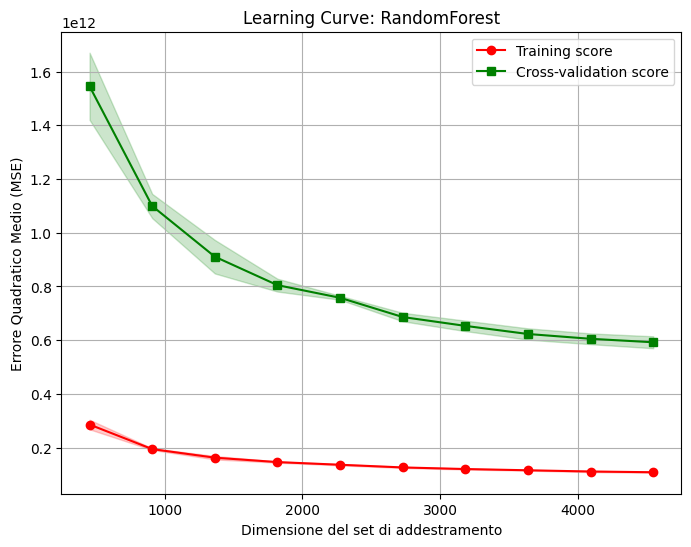


Deviazioni standard e varianze per il modello Lasso:
 Train Size    Train STD    Train VAR     Test STD     Test VAR
        454 4.631693e+10 2.145258e+21 1.045591e+11 1.093261e+22
        909 8.091419e+09 6.547106e+19 1.127972e+11 1.272320e+22
       1364 2.271453e+10 5.159501e+20 1.122022e+11 1.258934e+22
       1819 1.390557e+10 1.933648e+20 1.105085e+11 1.221212e+22
       2274 2.783171e+10 7.746043e+20 1.162278e+11 1.350890e+22
       2729 3.863758e+10 1.492862e+21 1.197719e+11 1.434530e+22
       3184 3.166375e+10 1.002593e+21 1.197519e+11 1.434053e+22
       3639 4.193540e+10 1.758578e+21 1.210064e+11 1.464255e+22
       4094 3.380367e+10 1.142688e+21 1.193803e+11 1.425165e+22
       4549 2.973847e+10 8.843767e+20 1.200750e+11 1.441800e+22


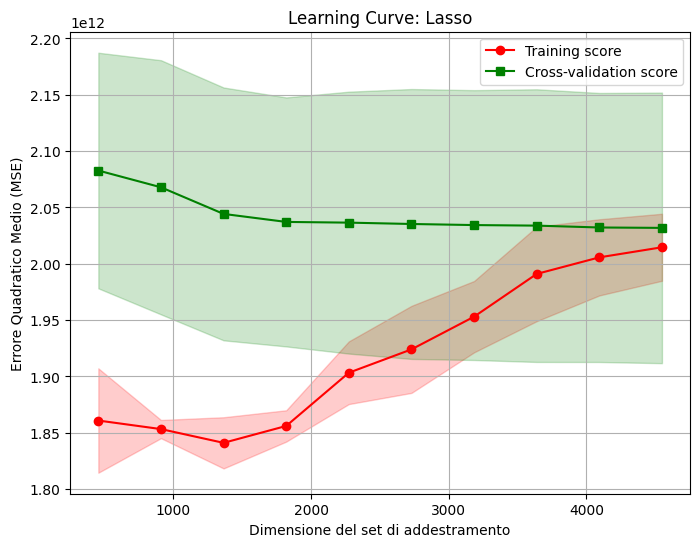


Deviazioni standard e varianze per il modello Ridge:
 Train Size    Train STD    Train VAR     Test STD     Test VAR
        454 4.639340e+10 2.152347e+21 1.023098e+11 1.046729e+22
        909 8.142787e+09 6.630497e+19 1.118771e+11 1.251649e+22
       1364 2.269788e+10 5.151938e+20 1.115515e+11 1.244374e+22
       1819 1.390008e+10 1.932123e+20 1.101957e+11 1.214309e+22
       2274 2.782989e+10 7.745027e+20 1.159564e+11 1.344590e+22
       2729 3.863680e+10 1.492802e+21 1.196237e+11 1.430983e+22
       3184 3.166300e+10 1.002546e+21 1.196994e+11 1.432795e+22
       3639 4.193502e+10 1.758546e+21 1.209361e+11 1.462555e+22
       4094 3.380336e+10 1.142667e+21 1.193109e+11 1.423509e+22
       4549 2.973825e+10 8.843634e+20 1.200284e+11 1.440682e+22


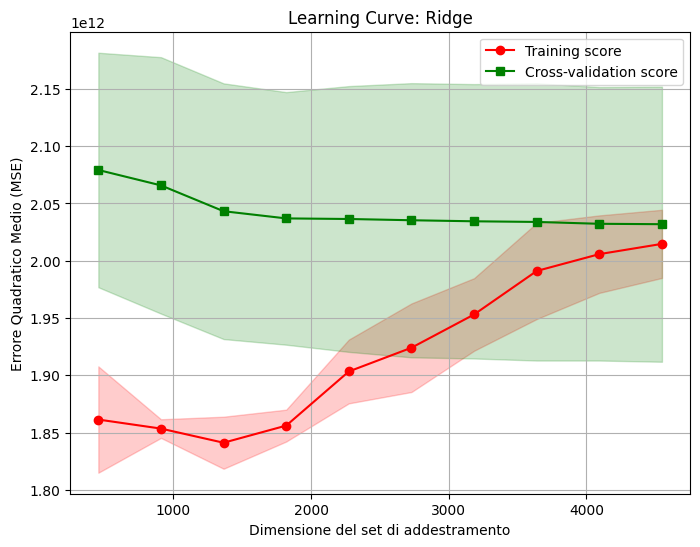


Deviazioni standard e varianze per il modello DecisionTree:
 Train Size    Train STD    Train VAR     Test STD     Test VAR
        454 3.294321e+09 1.085255e+19 1.628922e+11 2.653387e+22
        909 2.068246e+10 4.277642e+20 1.018728e+11 1.037807e+22
       1364 1.169943e+10 1.368767e+20 1.749138e+11 3.059483e+22
       1819 2.863680e+10 8.200663e+20 1.594449e+11 2.542266e+22
       2274 6.648941e+09 4.420842e+19 9.419305e+10 8.872331e+21
       2729 2.082099e+10 4.335135e+20 9.578047e+10 9.173898e+21
       3184 8.676393e+09 7.527980e+19 4.157403e+10 1.728400e+21
       3639 2.159552e+10 4.663666e+20 4.657471e+10 2.169204e+21
       4094 1.495878e+10 2.237651e+20 4.450341e+10 1.980553e+21
       4549 1.126693e+10 1.269436e+20 6.258787e+10 3.917242e+21


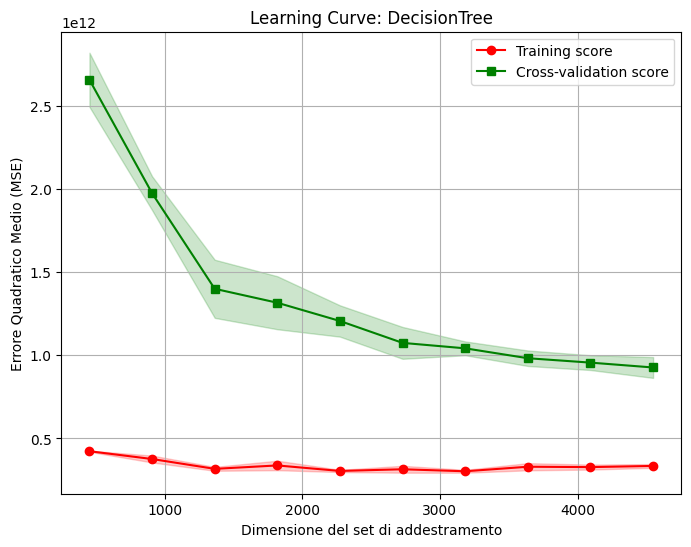


Deviazioni standard e varianze per il modello GradientBoosting:
 Train Size    Train STD    Train VAR     Test STD     Test VAR
        454 1.093940e+08 1.196705e+16 8.256308e+10 6.816661e+21
        909 7.219902e+08 5.212699e+17 4.816292e+10 2.319666e+21
       1364 3.414059e+09 1.165580e+19 2.662807e+10 7.090543e+20
       1819 6.099561e+09 3.720465e+19 1.211348e+10 1.467365e+20
       2274 8.375186e+09 7.014375e+19 2.016940e+10 4.068046e+20
       2729 6.399090e+09 4.094835e+19 1.727428e+10 2.984007e+20
       3184 4.417245e+09 1.951205e+19 1.867040e+10 3.485839e+20
       3639 5.787218e+09 3.349190e+19 1.464044e+10 2.143426e+20
       4094 3.493253e+09 1.220281e+19 2.260143e+10 5.108246e+20
       4549 2.751780e+09 7.572294e+18 2.248819e+10 5.057186e+20


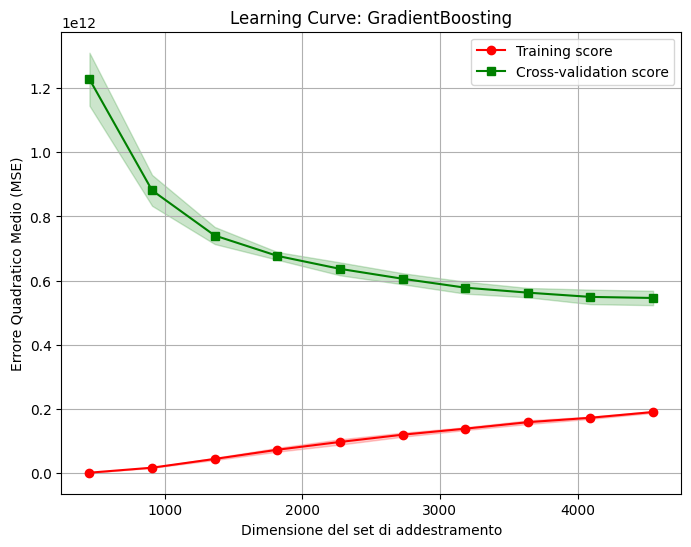

In [38]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
import pandas as pd

# Funzione per stampare deviazioni standard e varianze, e creare curve di apprendimento
def plot_learning_curves(model, model_name, X_train, y_train):
    # Usa cross-validation a 5 fold per calcolare la curva di apprendimento
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, n_jobs=-1, scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )

    # Calcolo media e deviazione standard
    train_mean = np.mean(-train_scores, axis=1)  # MSE positivo
    train_std = np.std(-train_scores, axis=1)
    test_mean = np.mean(-test_scores, axis=1)
    test_std = np.std(-test_scores, axis=1)

    # Calcolo varianza
    train_var = train_std ** 2
    test_var = test_std ** 2

    # Organizza deviazioni standard e varianze in un dataframe
    std_var_data = pd.DataFrame({
        "Train Size": train_sizes,
        "Train STD": train_std,
        "Train VAR": train_var,
        "Test STD": test_std,
        "Test VAR": test_var
    })

    # Mostra il dataframe tabellare con deviazioni standard e varianze
    print(f"\nDeviazioni standard e varianze per il modello {model_name}:")
    print(std_var_data.to_string(index=False))

    # Grafico della curva di apprendimento
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label="Training score", color="red", marker="o")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="red", alpha=0.2)

    plt.plot(train_sizes, test_mean, label="Cross-validation score", color="green", marker="s")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

    plt.title(f"Learning Curve: {model_name}")
    plt.xlabel("Dimensione del set di addestramento")
    plt.ylabel("Errore Quadratico Medio (MSE)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Genera le curve di apprendimento e stampa deviazione standard e varianza per ciascun modello
for model_name, model in best_models.items():
    plot_learning_curves(model, model_name, X_train, y_train)


PREDIZIONE PREZZO CASA, (INPUT UTENTE = automatico)

In [30]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# Carica il modello addestrato e gli encoder delle etichette
model_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/best_model.pkl"
model = joblib.load(model_file_path)

label_encoder_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/label_encoders.pkl"
label_encoders = joblib.load(label_encoder_file_path)

# Carica il dataset preelaborato per il filtraggio
data_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/preprocessed_house_data.csv"
data = pd.read_csv(data_file_path)

# Determina le caratteristiche attese dal modello
try:
    if hasattr(model, 'feature_names_in_'):
        expected_features = model.feature_names_in_.tolist()
    else:
        # Usa una lista di fallback se i nomi delle caratteristiche non sono disponibili
        expected_features = [
            'AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
            'BUILDTYPE', 'PARK_FACIL', 'QS_ROOMS', 'QS_BATHROOM',
            'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
            'SALE_YEAR', 'BUILD_YEAR', 'SALE_MONTH', 'BUILD_AGE', 'DIST_MAINROAD'
        ]
except Exception as e:
    print(f"Error determining feature names: {e}")
    expected_features = []

# Genera valori casuali per la previsione
areas = ['Adyar', 'Anna Nagar', 'Chrompet', 'Karapakkam', 'KK Nagar', 'TNagar', 'T Nagar', 'Velachery']
build_types = ['Commercial', 'House', 'Others']
park_facil_options = ['Yes', 'No']

area_filter = np.random.choice(areas)
build_type_filter = np.random.choice(build_types)
park_facil_filter = np.random.choice(park_facil_options)
int_sqft = np.random.uniform(500, 5000)  # Genera un numero casuale tra 500 e 5000
n_bedroom = np.random.randint(1, 6)  # Genera un numero intero casuale tra 1 e 5
n_bathroom = np.random.randint(1, 4)  # Genera un numero intero casuale tra 1 e 3
n_room = n_bedroom + n_bathroom + np.random.randint(1, 3)  # Totale stanze
qs_rooms = np.random.uniform(0, 10)  # Qualità stanze
qs_bathroom = np.random.uniform(0, 10)  # Qualità bagno
qs_bedroom = np.random.uniform(0, 10)  # Qualità camera
qs_overall = np.random.uniform(0, 10)  # Qualità complessiva
sale_year = np.random.randint(int(data["SALE_YEAR"].min()), int(data["SALE_YEAR"].max()) + 1)
build_year = np.random.randint(int(data["BUILD_YEAR"].min()), int(data["BUILD_YEAR"].max()) + 1)
sale_month = np.random.randint(1, 13)  # Mese della vendita
reg_fee = np.random.uniform(5000, 50000)  # Tassa di registrazione
commis = np.random.uniform(1000, 10000)  # Commissione

# Stampa i dati generati
print("\n### Dati Generati Randomicamente:")
print(f"- Area: {area_filter}")
print(f"- Tipo di Edificio: {build_type_filter}")
print(f"- Facilità di Parco: {park_facil_filter}")
print(f"- Metri Quadrati Interni: {int_sqft:.2f}")
print(f"- Numero di Camere da Letto: {n_bedroom}")
print(f"- Numero di Bagni: {n_bathroom}")
print(f"- Totale Stanze: {n_room}")
print(f"- Qualità Stanze (0-10): {qs_rooms:.2f}")
print(f"- Qualità Bagno (0-10): {qs_bathroom:.2f}")
print(f"- Qualità Camera (0-10): {qs_bedroom:.2f}")
print(f"- Qualità Complessiva (0-10): {qs_overall:.2f}")
print(f"- Tassa di Registrazione (INR): {reg_fee:.2f}")
print(f"- Commissione (INR): {commis:.2f}")
print(f"- Anno di Vendita: {sale_year}")
print(f"- Anno di Costruzione: {build_year}")
print(f"- Mese di Vendita: {sale_month}")

# Calcola l'ETÀ_COSTRUZIONE
current_year = datetime.now().year
build_age = current_year - build_year

# Valore segnaposto per DIST_MAINROAD
dist_mainroad = 'No'  # Valore segnaposto; regola in base al tuo dataset
encoded_dist_mainroad = label_encoders['DIST_MAINROAD'].transform([dist_mainroad])[0] if 'DIST_MAINROAD' in label_encoders else 0

# Codifica le caratteristiche categoriche usando gli encoder delle etichette salvati
encoded_area = label_encoders['AREA'].transform([area_filter])[0]
encoded_build_type = label_encoders['BUILDTYPE'].transform([build_type_filter])[0]
encoded_park_facil = label_encoders['PARK_FACIL'].transform([park_facil_filter])[0]

# Prepara i dati di input per la previsione
input_data = pd.DataFrame({
    'AREA': [encoded_area],
    'INT_SQFT': [int_sqft],
    'N_BEDROOM': [n_bedroom],
    'N_BATHROOM': [n_bathroom],
    'N_ROOM': [n_room],
    'BUILDTYPE': [encoded_build_type],
    'PARK_FACIL': [encoded_park_facil],
    'QS_ROOMS': [qs_rooms],
    'QS_BATHROOM': [qs_bathroom],
    'QS_BEDROOM': [qs_bedroom],
    'QS_OVERALL': [qs_overall],
    'REG_FEE': [reg_fee],
    'COMMIS': [commis],
    'SALE_YEAR': [sale_year],
    'BUILD_YEAR': [build_year],
    'SALE_MONTH': [sale_month],
    'BUILD_AGE': [build_age],
    'DIST_MAINROAD': [encoded_dist_mainroad]
}, columns=expected_features)  # Assicurati che tutte le colonne siano presenti e nell'ordine corretto

# Prevedi il prezzo della casa
try:
    prediction = model.predict(input_data)
    avg_predicted_price_inr = prediction[0]

    # Converti da INR a Euro (supponendo un tasso di cambio di 1 Euro = 90 INR)
    exchange_rate = 90.0  # Esempio di tasso di cambio
    avg_predicted_price_euro = avg_predicted_price_inr / exchange_rate

    print(f"\n### Prezzo Previsto della Casa: {avg_predicted_price_inr:,.2f} INR")
    print(f"### Prezzo Previsto della Casa: {avg_predicted_price_euro:,.2f} Euro")

except Exception as e:
    print(f"Error in prediction: {e}")



### Dati Generati Randomicamente:
- Area: TNagar
- Tipo di Edificio: House
- Facilità di Parco: No
- Metri Quadrati Interni: 3759.81
- Numero di Camere da Letto: 3
- Numero di Bagni: 1
- Totale Stanze: 6
- Qualità Stanze (0-10): 3.48
- Qualità Bagno (0-10): 1.34
- Qualità Camera (0-10): 1.73
- Qualità Complessiva (0-10): 6.36
- Tassa di Registrazione (INR): 8125.16
- Commissione (INR): 8440.30
- Anno di Vendita: 2004
- Anno di Costruzione: 1981
- Mese di Vendita: 6

### Prezzo Previsto della Casa: 4,847,154.33 INR
### Prezzo Previsto della Casa: 53,857.27 Euro


PROLOG

classificazione basata su regole

In [31]:
!apt-get install swi-prolog
!pip install pyswip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
swi-prolog is already the newest version (8.4.2+dfsg-2ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [32]:
from sklearn.tree import _tree
import joblib
from pyswip import Prolog
from datetime import datetime
import pandas as pd

# Funzione per convertire l'albero in codice Prolog
def tree_to_prolog(regressor, node_id=0, parent_id=None):
    base_code = """
% Predice il prezzo di una casa in base alle caratteristiche fornite
predire_prezzo(Features, Prezzo) :-
    percorri_albero(0, Features, Prezzo).

% Passo base
percorri_albero(NodeID, _, Predizione) :-
    leaf(NodeID, Predizione).

% Passo ricorsivo
percorri_albero(NodeID, Features, Predizione) :-
    node(NodeID, FeatureIndex, Threshold, LeftChild, RightChild),
    nth0(FeatureIndex, Features, FeatureValue),
    (FeatureValue =< Threshold ->
        percorri_albero(LeftChild, Features, Predizione)
    ;
        percorri_albero(RightChild, Features, Predizione)).
"""

    result = ""
    # Controlla se è un nodo foglia
    if regressor.tree_.children_left[node_id] == -1:
        value = regressor.tree_.value[node_id][0, 0]
        result += f"leaf({node_id}, {value}).\n"
    else:
        feature = regressor.tree_.feature[node_id]
        threshold = regressor.tree_.threshold[node_id]
        left_child = regressor.tree_.children_left[node_id]
        right_child = regressor.tree_.children_right[node_id]
        result += f"node({node_id}, {feature}, {threshold}, {left_child}, {right_child}).\n"
        result += tree_to_prolog(regressor, left_child, node_id)
        result += tree_to_prolog(regressor, right_child, node_id)

    if parent_id is None:
        return base_code + result
    return result

# Funzione per raccogliere input dall'utente
def get_user_input():
    # Genera valori casuali per la previsione
    areas = ['Adyar', 'Anna Nagar', 'Chrompet', 'Karapakkam', 'KK Nagar', 'TNagar', 'T Nagar', 'Velachery']
    build_types = ['Commercial', 'House', 'Others']
    park_facil_options = ['Yes', 'No']

    area_filter = np.random.choice(areas)
    build_type_filter = np.random.choice(build_types)
    park_facil_filter = np.random.choice(park_facil_options)
    int_sqft = np.random.randint(500, 5000)
    n_bedroom = np.random.randint(1, 6)
    n_bathroom = np.random.randint(1, 4)
    n_room = n_bedroom + n_bathroom + np.random.randint(1, 3)
    qs_rooms = np.random.randint(0, 10)
    qs_bathroom = np.random.randint(0, 10)
    qs_bedroom = np.random.randint(0, 10)
    qs_overall = np.random.randint(0, 10)
    sale_year = np.random.randint(int(data["SALE_YEAR"].min()), int(data["SALE_YEAR"].max()) + 1)
    build_year = np.random.randint(int(data["BUILD_YEAR"].min()), int(data["BUILD_YEAR"].max()) + 1)
    sale_month = np.random.randint(1, 13)
    reg_fee = np.random.uniform(5000, 50000)
    commis = np.random.uniform(1000, 10000)

    return (area_filter, build_type_filter, park_facil_filter, int_sqft, n_bedroom, n_room, n_bathroom,
            qs_rooms, qs_bathroom, qs_bedroom, qs_overall, reg_fee, commis, sale_year, build_year, sale_month)

# Carica il modello addestrato
model_file_path = r"/content/drive/MyDrive/Colab Notebooks/iconDataset/decision_tree_model.pkl"
decision_tree_model = joblib.load(model_file_path)

# Estrai e salva le regole in formato Prolog
pl_code = tree_to_prolog(decision_tree_model)
with open("/content/drive/MyDrive/Colab Notebooks/iconDataset/decision_tree_rules.pl", "w", encoding="utf-8") as f:
    f.write(pl_code)

# Carica il file Prolog
prolog = Prolog()
prolog.consult("/content/drive/MyDrive/Colab Notebooks/iconDataset/decision_tree_rules.pl")

# Raccogli input dall'utente
(area_filter, build_type_filter, park_facil_filter, int_sqft,
 n_bedroom, n_room, n_bathroom, qs_rooms, qs_bathroom,
 qs_bedroom, qs_overall, reg_fee, commis, sale_year,
 build_year, sale_month) = get_user_input()

# Codifica le caratteristiche categoriche usando gli encoder delle etichette
encoded_area = label_encoders['AREA'].transform([area_filter])[0]
encoded_build_type = label_encoders['BUILDTYPE'].transform([build_type_filter])[0]
encoded_park_facil = label_encoders['PARK_FACIL'].transform([park_facil_filter])[0]

# Calcola l'ETÀ_COSTRUZIONE
current_year = datetime.now().year
build_age = current_year - build_year

# Valore segnaposto per DIST_MAINROAD
dist_mainroad = 'No'
#encoded_dist_mainroad = label_encoders['DIST_MAINROAD'].transform([dist_mainroad])[0]

# Prepara i dati di input per la previsione
input_data = pd.DataFrame({
    'AREA': [encoded_area],
    'INT_SQFT': [int_sqft],
    'N_BEDROOM': [n_bedroom],
    'N_BATHROOM': [n_bathroom],
    'N_ROOM': [n_room],
    'BUILDTYPE': [encoded_build_type],
    'PARK_FACIL': [encoded_park_facil],
    'QS_ROOMS': [qs_rooms],
    'QS_BATHROOM': [qs_bathroom],
    'QS_BEDROOM': [qs_bedroom],
    'QS_OVERALL': [qs_overall],
    'REG_FEE': [reg_fee],
    'COMMIS': [commis],
    'SALE_YEAR': [sale_year],
    'BUILD_YEAR': [build_year],
    'SALE_MONTH': [sale_month],
    'BUILD_AGE': [build_age],
    'DIST_MAINROAD': [encoded_dist_mainroad]
}, columns=expected_features)  # Assicurati che tutte le colonne siano presenti e nell'ordine corretto

# Previsione con il modello Decision Tree
tree_pred = decision_tree_model.predict(input_data)[0]

# Esegui la previsione con Prolog
features = [encoded_area, int_sqft, n_bedroom, n_bathroom, n_room, encoded_build_type, encoded_park_facil, qs_rooms,
            qs_bathroom, qs_bedroom, qs_overall, reg_fee, commis, sale_year, build_year, sale_month, build_age, encoded_dist_mainroad]
prolog_result = list(prolog.query(f"predire_prezzo({features}, Prediction)"))[0]['Prediction']

# Stampa i risultati
print(f"Predizione Prolog: {prolog_result}")
print(f"Predizione Decision Tree: {tree_pred}")
print(f"Features usate per Prolog: {features}")



Predizione Prolog: 2156875.0
Predizione Decision Tree: 5709085.0
Features usate per Prolog: [3, 2317, 2, 3, 6, 0, 1, 2, 2, 2, 5, 45019.19137212555, 4016.8345615947587, 2009, 1952, 8, 72, 0]


In [33]:
!pip install rdflib

GRAFI,ONTOLOGIE, OWL

In [34]:

from rdflib import Graph, URIRef, Literal, Namespace
from rdflib.namespace import RDF, OWL

# Definizione dello spazio dei nomi
ns = Namespace("http://example.org/housing_ontology#")

# Creazione del grafo RDF
g = Graph()

# Definizione delle classi
g.add((ns.House, RDF.type, OWL.Class))
g.add((ns.Area, RDF.type, OWL.Class))
g.add((ns.BuildType, RDF.type, OWL.Class))
g.add((ns.Price, RDF.type, OWL.Class))
g.add((ns.NumRooms, RDF.type, OWL.Class))
g.add((ns.NumBathrooms, RDF.type, OWL.Class))

# Definizione delle proprietà
g.add((ns.hasArea, RDF.type, OWL.ObjectProperty))
g.add((ns.hasBuildType, RDF.type, OWL.ObjectProperty))
g.add((ns.hasPrice, RDF.type, OWL.DatatypeProperty))
g.add((ns.hasNumRooms, RDF.type, OWL.DatatypeProperty))
g.add((ns.hasNumBathrooms, RDF.type, OWL.DatatypeProperty))

# Definizione di alcune case
house1 = URIRef("http://example.org/housing_ontology#House1")
g.add((house1, ns.hasArea, Literal("Adyar")))
g.add((house1, ns.hasBuildType, Literal("House")))
g.add((house1, ns.hasNumRooms, Literal(5)))
g.add((house1, ns.hasNumBathrooms, Literal(3)))
g.add((house1, ns.hasPrice, Literal(750000)))

# Visualizza l'ontologia
for s, p, o in g:
    print(s, p, o)

# Salva l'ontologia in formato RDF/OWL
g.serialize("/content/drive/MyDrive/Colab Notebooks/iconDataset/extended_housing_ontology.owl", format="xml")


http://example.org/housing_ontology#hasArea http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.w3.org/2002/07/owl#ObjectProperty
http://example.org/housing_ontology#NumRooms http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.w3.org/2002/07/owl#Class
http://example.org/housing_ontology#Area http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.w3.org/2002/07/owl#Class
http://example.org/housing_ontology#House1 http://example.org/housing_ontology#hasNumBathrooms 3
http://example.org/housing_ontology#Price http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.w3.org/2002/07/owl#Class
http://example.org/housing_ontology#NumBathrooms http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.w3.org/2002/07/owl#Class
http://example.org/housing_ontology#House http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.w3.org/2002/07/owl#Class
http://example.org/housing_ontology#hasBuildType http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.w3.org/2002/07/owl#

<Graph identifier=N938950deca654ba094f544bfb7dc0cd1 (<class 'rdflib.graph.Graph'>)>

In [35]:
import pandas as pd
from rdflib import Graph, URIRef, Literal, Namespace
from rdflib.namespace import RDF, OWL

# Definizione dello spazio dei nomi
ns = Namespace("http://example.org/housing_ontology#")

# Creazione del grafo RDF
g = Graph()

# Definizione delle classi
g.add((ns.House, RDF.type, OWL.Class))
g.add((ns.Area, RDF.type, OWL.Class))
g.add((ns.BuildType, RDF.type, OWL.Class))
g.add((ns.Price, RDF.type, OWL.Class))
g.add((ns.NumRooms, RDF.type, OWL.Class))
g.add((ns.NumBathrooms, RDF.type, OWL.Class))

# Carica i dati dal file CSV
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/iconDataset/preprocessed_house_data.csv")  # Sostituisci con il percorso del tuo file CSV

# Check if 'AREA' column exists (case-sensitive)
if 'AREA' in data.columns:
    # If 'AREA' exists, use 'AREA' instead of 'Area'
    for index, row in data.iterrows():
        house_uri = URIRef(f"http://example.org/housing_ontology#House{index+1}")  # Creazione di un URI unico
        g.add((house_uri, RDF.type, ns.House))
        g.add((house_uri, ns.hasArea, Literal(row['AREA'])))  # Changed to 'AREA'
        # Check if 'BUILDTYPE' column exists before accessing it
        if 'BUILDTYPE' in data.columns:
            g.add((house_uri, ns.hasBuildType, Literal(row['BUILDTYPE'])))  # Access 'BUILDTYPE' if it exists
        else:
            print("Column 'BUILDTYPE' not found. Skipping for this house.")
            # You might need to handle this case differently, e.g., set a default value or skip the triple
        g.add((house_uri, ns.hasNumRooms, Literal(row['N_BEDROOM'])))  # Assuming 'N_BEDROOM' is the NumRooms column
        g.add((house_uri, ns.hasNumBathrooms, Literal(row['N_BATHROOM'])))  # Assuming 'N_BATHROOM' is the NumBathrooms column
        g.add((house_uri, ns.hasPrice, Literal(row['SALES_PRICE'])))  # Assuming 'SALES_PRICE' is the Price column
else:
    print("Column 'AREA' not found in the DataFrame. Please check the CSV file.")
    # You might need to adjust the column name based on your CSV data.
    # For example, if the column name is 'area', use row['area'] instead.

# Visualizza l'ontologia
for s, p, o in g:
    print(s, p, o)

# Salva l'ontologia in formato RDF/OWL
g.serialize("/content/drive/MyDrive/Colab Notebooks/iconDataset/extended_housing_ontology.owl", format="xml")

Output streaming troncato alle ultime 5000 righe.
http://example.org/housing_ontology#House4314 http://example.org/housing_ontology#hasNumRooms 1.0
http://example.org/housing_ontology#House6262 http://example.org/housing_ontology#hasNumRooms 1.0
http://example.org/housing_ontology#House4071 http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://example.org/housing_ontology#House
http://example.org/housing_ontology#House2998 http://example.org/housing_ontology#hasNumBathrooms 1.0
http://example.org/housing_ontology#House411 http://example.org/housing_ontology#hasBuildType 2.0
http://example.org/housing_ontology#House3780 http://example.org/housing_ontology#hasArea 4.0
http://example.org/housing_ontology#House145 http://example.org/housing_ontology#hasPrice 6190150.0
http://example.org/housing_ontology#House3473 http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://example.org/housing_ontology#House
http://example.org/housing_ontology#House148 http://example.org/housing_ontology#hasBuil

<Graph identifier=N0fc169b0cb4345a09db610372a11b794 (<class 'rdflib.graph.Graph'>)>

In [36]:
!pip install python-constraint

SPARQL

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from rdflib import Graph, URIRef, Literal, Namespace
from rdflib.namespace import RDF

# Carica il modello preaddestrato
model = joblib.load("/content/drive/MyDrive/Colab Notebooks/iconDataset/best_model.pkl")

# Funzione per fare una previsione con il modello preaddestrato
def predict_with_gradient_boosting(int_sqft, n_bedrooms, n_bathrooms, area, build_type, park_facil, reg_fee, commis, sale_year, build_year, n_room, qs_rooms, qs_bathroom, qs_bedroom, qs_overall, sale_month, build_age, dist_mainroad):
    le_area = LabelEncoder()
    le_area.fit(["Adyar", "Anna Nagar", "Velachery", "Chrompet", "Karapakkam"])  # Fai il fit con le categorie delle aree
    encoded_area = le_area.transform([area])[0]

    le_build_type = LabelEncoder()
    le_build_type.fit(["Commercial", "House", "Others"])  # Fai il fit con le categorie dei tipi di edificio
    encoded_build_type = le_build_type.transform([build_type])[0]

    le_park_facil = LabelEncoder()
    le_park_facil.fit(["Yes", "No"])  # Fai il fit con le categorie delle facilità di parco
    encoded_park_facil = le_park_facil.transform([park_facil])[0]

    le_dist_mainroad = LabelEncoder()
    le_dist_mainroad.fit(["Near", "Far"])  # Esempio di categorie
    encoded_dist_mainroad = le_dist_mainroad.transform([dist_mainroad])[0]

    # Prepara i dati per il modello
    input_data = pd.DataFrame({
        'AREA': [encoded_area],
        'INT_SQFT': [int_sqft],
        'N_BEDROOM': [n_bedrooms],
        'N_BATHROOM': [n_bathrooms],
        'N_ROOM': [n_room],
        'BUILDTYPE': [encoded_build_type],
        'PARK_FACIL': [encoded_park_facil],
        'QS_ROOMS': [qs_rooms],
        'QS_BATHROOM': [qs_bathroom],
        'QS_BEDROOM': [qs_bedroom],
        'QS_OVERALL': [qs_overall],
        'REG_FEE': [reg_fee],
        'COMMIS': [commis],
        'SALE_YEAR': [sale_year],
        'BUILD_YEAR': [build_year],
        'SALE_MONTH': [sale_month],
        'BUILD_AGE': [build_age],
        'DIST_MAINROAD': [encoded_dist_mainroad]
    })

    # Assicurati di riorganizzare il DataFrame in base alle colonne utilizzate dal modello
    training_feature_names = model.feature_names_in_
    input_data = input_data[training_feature_names]

    # Previsione del prezzo
    predicted_price = model.predict(input_data)
    return predicted_price[0]  # Restituisce il prezzo previsto

# Creazione o caricamento dell'ontologia esistente
g = Graph()
g.parse("/content/drive/MyDrive/Colab Notebooks/iconDataset/extended_housing_ontology.owl", format="xml")

# Namespace e definizione delle classi
ns = Namespace("http://example.org/housing_ontology#")

# Funzione per aggiungere una nuova casa con il prezzo previsto nell'ontologia
def add_predicted_house_to_ontology(int_sqft, n_bedrooms, n_bathrooms, area, build_type, park_facil, predicted_price, n_room, qs_rooms, qs_bathroom, qs_bedroom, qs_overall, reg_fee, commis, sale_year, build_year, sale_month, build_age, dist_mainroad):
    house_id = f"House_{int_sqft}_{n_bedrooms}_{n_bathrooms}"  # Identificatore unico per la casa
    house_uri = URIRef(f"http://example.org/housing_ontology#{house_id}")

    # Aggiungi la casa e le sue caratteristiche nell'ontologia
    g.add((house_uri, RDF.type, ns.House))
    g.add((house_uri, ns.hasArea, Literal(area)))
    g.add((house_uri, ns.hasNumRooms, Literal(n_bedrooms)))
    g.add((house_uri, ns.hasNumBathrooms, Literal(n_bathrooms)))
    g.add((house_uri, ns.hasBuildingType, Literal(build_type)))  # Aggiunta del tipo di edificio
    g.add((house_uri, ns.hasParkFacility, Literal(park_facil)))  # Aggiunta della facilità di parco
    g.add((house_uri, ns.hasPrice, Literal(predicted_price)))
    g.add((house_uri, ns.hasNumTotalRooms, Literal(n_room)))  # Aggiunta della nuova feature N_ROOM
    g.add((house_uri, ns.hasQualityRooms, Literal(qs_rooms)))  # Aggiunta di QS_ROOMS
    g.add((house_uri, ns.hasQualityBathrooms, Literal(qs_bathroom)))  # Aggiunta di QS_BATHROOM
    g.add((house_uri, ns.hasQualityBedrooms, Literal(qs_bedroom)))  # Aggiunta di QS_BEDROOM
    g.add((house_uri, ns.hasOverallQuality, Literal(qs_overall)))  # Aggiunta di QS_OVERALL
    g.add((house_uri, ns.hasRegFee, Literal(reg_fee)))  # Aggiunta di REG_FEE
    g.add((house_uri, ns.hasCommission, Literal(commis)))  # Aggiunta di COMMIS
    g.add((house_uri, ns.hasSaleYear, Literal(sale_year)))  # Aggiunta di SALE_YEAR
    g.add((house_uri, ns.hasBuildYear, Literal(build_year)))  # Aggiunta di BUILD_YEAR
    g.add((house_uri, ns.hasSaleMonth, Literal(sale_month)))  # Aggiunta di SALE_MONTH
    g.add((house_uri, ns.hasBuildAge, Literal(build_age)))  # Aggiunta di BUILD_AGE
    g.add((house_uri, ns.hasDistMainroad, Literal(dist_mainroad)))  # Aggiunta di DIST_MAINROAD

    # Salva l'ontologia aggiornata
    g.serialize("/content/drive/MyDrive/Colab Notebooks/iconDataset/extended_housing_ontology.owl", format="xml")

# Esempio di utilizzo
predicted_price_inr = predict_with_gradient_boosting(2000, 4, 2, "Anna Nagar", "Commercial", "Yes", 10000, 2000, 2020, 2010, 5, 4, 4, 2, 7, 6, 15, "Near")

# Tasso di cambio da INR a euro (esempio: 1 euro = 90 INR)
exchange_rate = 90
predicted_price_euro = predicted_price_inr / exchange_rate

add_predicted_house_to_ontology(2000, 4, 2, "Anna Nagar", "Commercial", "Yes", predicted_price_inr, 5, 5, 4, 2, 7, 10000, 2000, 2020, 2010, 6, 15, "Near")

print(f"Prezzo previsto per la casa aggiunto all'ontologia: {predicted_price_euro:.2f} EUR")

# Funzione per interrogare l'ontologia arricchita con le previsioni del modello
def query_predicted_prices(area):
    g = Graph()
    g.parse("/content/drive/MyDrive/Colab Notebooks/iconDataset/extended_housing_ontology.owl", format="xml")

    # Query SPARQL per ottenere case nell'area specificata con i prezzi previsti
    query = f"""
    PREFIX ns: <http://example.org/housing_ontology#>
    SELECT ?house ?price
    WHERE {{
        ?house ns:hasArea "{area}" .
        ?house ns:hasPrice ?price .
    }}
    """
    results = g.query(query)

    for row in results:
         # Converti il prezzo da Literal a float
        price_inr = float(row.price)  # Converti il valore in un numero
        price_euro = price_inr / exchange_rate
        print(f"Casa: {row.house}, Prezzo: {price_inr:.2f} INR, Prezzo: {price_euro:.2f} EUR")


# Esempio di utilizzo
query_predicted_prices("Anna Nagar")
query_predicted_prices("Adyar")


Prezzo previsto per la casa aggiunto all'ontologia: 93358.97 EUR
Casa: http://example.org/housing_ontology#House_2000_4_2, Prezzo: 8402307.60 INR, Prezzo: 93358.97 EUR
